This notebook shows how we transformed ANN 4 from keras into pytorch 

In [ ]:
import tensorflow as tf
from cbrain import *
import torch as to
from tensorflow.keras.layers import Input, Dense, Concatenate, Lambda,Dropout
from cbrain.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.losses import mse
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import LearningRateScheduler


import numpy as np
import matplotlib.pyplot as plt
import argparse
import os
import xarray as xr

import tensorflow.keras as ke


from cbrain.imports import *

from cbrain.utils import *

from cbrain.cam_constants import *

from cbrain.data_generator import DataGenerator
import pandas as ps

In [52]:
# define some hyperparameters 

original_dim_input=109  # CBRAIN input node size

original_dim_output=int(112) # CBRAIN output node size 


input_shape = (original_dim_input,)
out_shape=(original_dim_output,)
intermediate_dim = 350

batch_size= 9802





In [53]:
#load keras model 

ANN_4=ke.models.load_model('real_geography/ANNs/ANNs_lin/ANN_4/ANN_4_CRM_lin_model.h5')
ANN_4.summary()
ANN_4_weights=ANN_4.get_weights()

batch_size= 9802


Model: "ANN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 109)]             0         
                                                                 
 dense (Dense)               (None, 350)               38500     
                                                                 
 dense_1 (Dense)             (None, 350)               122850    
                                                                 
 dense_2 (Dense)             (None, 350)               122850    
                                                                 
 dense_3 (Dense)             (None, 350)               122850    
                                                                 
 dense_4 (Dense)             (None, 350)               122850    
                                                                 
 dense_5 (Dense)             (None, 350)               122850  

import pytorch 

In [54]:
import torch.nn as nn
import torch.nn.functional as F

In [55]:
# build ANN 4 in pytorch
class ANN(nn.Module):
    def __init__(self):
        super(ANN,self).__init__()
        self.X_1=nn.Linear(109,350)
        self.X_2=nn.Linear(350,350)
        self.X_3=nn.Linear(350,350)
        self.X_4=nn.Linear(350,350)
        self.X_5=nn.Linear(350,350)
        self.X_6=nn.Linear(350,350)
        self.X_7=nn.Linear(350,350)
        self.X_8=nn.Linear(350,350)
        self.X_9=nn.Linear(350,112)
        self.X_10=nn.Linear(112,112)

    def forward(self,x):
        x=F.elu_(self.X_1(x))
        x=F.elu_(self.X_2(x))
        x=F.elu_(self.X_3(x))
        x=F.elu_(self.X_4(x))
        x=F.elu_(self.X_5(x))
        x=F.elu_(self.X_6(x))
        x=F.elu_(self.X_7(x))
        x=F.elu_(self.X_8(x))
        x=F.elu_(self.X_9(x))
        x=self.X_10(x)

        
        return x
    
    
        



        


In [56]:
# initialize ANN 4 in pytorch
ANN_4_torch=ANN()
print(ANN_4_torch)

ANN(
  (X_1): Linear(in_features=109, out_features=350, bias=True)
  (X_2): Linear(in_features=350, out_features=350, bias=True)
  (X_3): Linear(in_features=350, out_features=350, bias=True)
  (X_4): Linear(in_features=350, out_features=350, bias=True)
  (X_5): Linear(in_features=350, out_features=350, bias=True)
  (X_6): Linear(in_features=350, out_features=350, bias=True)
  (X_7): Linear(in_features=350, out_features=350, bias=True)
  (X_8): Linear(in_features=350, out_features=350, bias=True)
  (X_9): Linear(in_features=350, out_features=112, bias=True)
  (X_10): Linear(in_features=112, out_features=112, bias=True)
)


load keras weights and biases in pytorch model 

In [57]:
ANN_4_torch.X_1.weight.data=to.from_numpy(np.transpose(ANN_4_weights[0]))
ANN_4_torch.X_1.bias.data=to.from_numpy(np.transpose(ANN_4_weights[1]))
ANN_4_torch.X_2.weight.data=to.from_numpy(np.transpose(ANN_4_weights[2]))
ANN_4_torch.X_2.bias.data=to.from_numpy(np.transpose(ANN_4_weights[3]))
ANN_4_torch.X_3.weight.data=to.from_numpy(np.transpose(ANN_4_weights[4]))
ANN_4_torch.X_3.bias.data=to.from_numpy(np.transpose(ANN_4_weights[5]))
ANN_4_torch.X_4.weight.data=to.from_numpy(np.transpose(ANN_4_weights[6]))
ANN_4_torch.X_4.bias.data=to.from_numpy(np.transpose(ANN_4_weights[7]))
ANN_4_torch.X_5.weight.data=to.from_numpy(np.transpose(ANN_4_weights[8]))
ANN_4_torch.X_5.bias.data=to.from_numpy(np.transpose(ANN_4_weights[9]))
ANN_4_torch.X_6.weight.data=to.from_numpy(np.transpose(ANN_4_weights[10]))
ANN_4_torch.X_6.bias.data=to.from_numpy(np.transpose(ANN_4_weights[11]))
ANN_4_torch.X_7.weight.data=to.from_numpy(np.transpose(ANN_4_weights[12]))
ANN_4_torch.X_7.bias.data=to.from_numpy(np.transpose(ANN_4_weights[13]))
ANN_4_torch.X_8.weight.data=to.from_numpy(np.transpose(ANN_4_weights[14]))
ANN_4_torch.X_8.bias.data=to.from_numpy(np.transpose(ANN_4_weights[15]))
ANN_4_torch.X_9.weight.data=to.from_numpy(np.transpose(ANN_4_weights[16]))
ANN_4_torch.X_9.bias.data=to.from_numpy(np.transpose(ANN_4_weights[17]))
ANN_4_torch.X_10.weight.data=to.from_numpy(np.transpose(ANN_4_weights[18]))
ANN_4_torch.X_10.bias.data=to.from_numpy(np.transpose(ANN_4_weights[19]))


In [58]:
# define input and output variables 
in_vars = ['QBP', 'TBP','PS', 'SOLIN', 'SHFLX', 'LHFLX','PRECTt-dt','CLDLIQBP','CLDICEBP']
out_vars = ['QBCTEND','TBCTEND','CLDLIQBCTEND','CLDICEBCTEND','PREC_CRM_SNOW','PREC_CRM',
            'NN2L_FLWDS','NN2L_DOWN_SW','NN2L_SOLL','NN2L_SOLLD','NN2L_SOLS','NN2L_SOLSD']

#loading the output normalization scalars for SP variables ( stds over 2 months of SP simulation)

scale_array=ps.read_csv('nn_config/scale_dicts/real_geography_SP_vars_updt.csv')


QBC_std_surf=scale_array.QBCTEND_std.values[-1]

TBC_std=scale_array.TBCTEND_std.values[-1]
CLDLIQBCTEND_std=scale_array.CLDLIQBCTEND_std.values[-1]
CLDICEBCTEND_std=scale_array.CLDICEBCTEND_std.values[-1]


PREC_CRM_SNOW_std=scale_array.PRECT_CRM_SNOW_std.values
PREC_CRM_std=scale_array.PRECT_CRM_std.values

NN2L_FLWDS_std=scale_array.NN2L_FLWDS_std.values
NN2L_DOWN_SW_std=scale_array.NN2L_DOWN_SW_std.values
NN2L_SOLL_std=scale_array.NN2L_SOLL_std.values
NN2L_SOLLD_std=scale_array.NN2L_SOLLD_std.values
NN2L_SOLS_std=scale_array.NN2L_SOLS_mean_std.values
NN2L_SOLSD_std=scale_array.NN2L_SOLSD_mean_std.values





# defining the scaling dict for the ANN training 

scale_dict_II = {
    'QBCTEND': 1/QBC_std_surf, 
    'TBCTEND': 1/TBC_std, 
    'CLDICEBCTEND': 1/CLDICEBCTEND_std, 
    'CLDLIQBCTEND': 1/CLDLIQBCTEND_std, 
    'NN2L_FLWDS':1/NN2L_FLWDS_std,
    'NN2L_DOWN_SW':1/NN2L_DOWN_SW_std,
    'NN2L_SOLL':1/NN2L_SOLL_std,
    'NN2L_SOLLD':1/NN2L_SOLLD_std,
    'NN2L_SOLS':1/NN2L_SOLS_std,
    'NN2L_SOLSD':1/NN2L_SOLSD_std,    
    'PRECT': 1/PRECT_std,
    'PREC_CRM': 1/PREC_CRM_std,
    'PREC_CRM_SNOW': 1/PREC_CRM_SNOW_std
}





# load vertical axis in pressure coords 

from cbrain.data_generator import DataGenerator

test_xr=xr.open_dataset('/work/bd1179/from_Mistral/bd1179/b381624/CESM2_NN2_pelayout01_ens_07.cam.h1.2013-01-01-00000.nc')
hybi=test_xr.hybi
hyai=test_xr.hyai

PS = 1e5; P0 = 1e5;
P = P0*hyai+PS*hybi; # Total pressure [Pa]
dP = P[1:]-P[:-1];


# load test data set

val_gen_II = DataGenerator(
    data_fn = '../SPCESM_data/2015_test_7_consec_days_mem.nc',
    input_vars = in_vars,
    output_vars = out_vars,
    norm_fn = '../SPCESM_data/2013_norm_7_consec_days_mem.nc',
    input_transform = ('mean', 'maxrs'),
    output_transform = scale_dict_II,
    batch_size=int(96*144),
    shuffle=True
)

In [59]:
from cbrain.save_weights import save_norm

predict with keras and pytorch model 

In [61]:
pred_keras= ANN_4.predict(val_gen_II[300][0])

432/432 [==============================] - 1s 1ms/step


In [62]:
print(pred_keras.shape)
pred_keras

(13824, 112)


array([[ 4.1940340e-12,  1.4024892e-12, -1.9233226e-12, ...,
         2.6372910e-01,  1.9013592e+00,  8.6717099e-01],
       [ 4.1983084e-12,  1.4039603e-12, -1.9252100e-12, ...,
         2.6482400e-01,  1.9011621e+00,  8.6777812e-01],
       [ 4.1981973e-12,  1.4039603e-12, -1.9251822e-12, ...,
         2.6480168e-01,  1.9011674e+00,  8.6776507e-01],
       ...,
       [-4.0892845e-12, -1.3659074e-12,  1.8831603e-12, ...,
         1.4338493e-03,  2.7773939e-03, -1.6542273e-02],
       [-4.0892290e-12, -1.3659351e-12,  1.8830770e-12, ...,
         1.4280081e-03,  2.7789138e-03, -1.6541367e-02],
       [-4.0767389e-12, -1.3617718e-12,  1.8773594e-12, ...,
         1.5250146e-03,  2.7638562e-03, -1.6542705e-02]], dtype=float32)

In [63]:
pred_pytorch=ANN_4_torch(to.from_numpy(val_gen_II[300][0]))

In [64]:
pred_pytorch

tensor([[ 4.1939e-12,  1.4025e-12, -1.9234e-12,  ...,  2.6373e-01,
          1.9014e+00,  8.6717e-01],
        [ 4.1983e-12,  1.4040e-12, -1.9252e-12,  ...,  2.6482e-01,
          1.9012e+00,  8.6778e-01],
        [ 4.1982e-12,  1.4040e-12, -1.9252e-12,  ...,  2.6480e-01,
          1.9012e+00,  8.6776e-01],
        ...,
        [-4.0893e-12, -1.3659e-12,  1.8832e-12,  ...,  1.4340e-03,
          2.7774e-03, -1.6542e-02],
        [-4.0892e-12, -1.3660e-12,  1.8831e-12,  ...,  1.4281e-03,
          2.7788e-03, -1.6542e-02],
        [-4.0767e-12, -1.3618e-12,  1.8773e-12,  ...,  1.5248e-03,
          2.7640e-03, -1.6543e-02]], grad_fn=<AddmmBackward0>)

In [65]:
# get weights and biases from pytorch ANN 4
module = to.jit.trace(ANN_4_torch.forward, to.from_numpy(val_gen_II[300][0]))

In [66]:
# get entrie model with forward step 
mod = to.jit.trace(ANN_4_torch, to.from_numpy(val_gen_II[300][0]))

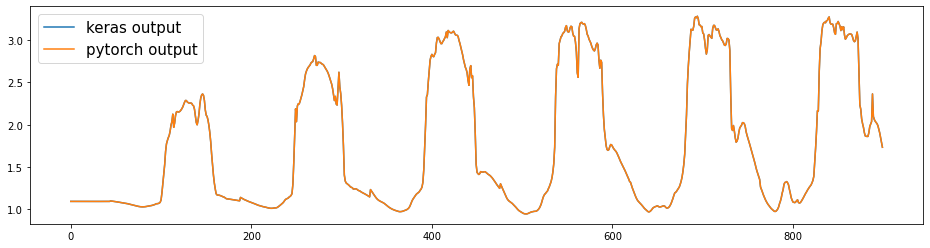

In [67]:
plt.figure(1,(16,4))
plt.plot(pred_keras[100:1000,106],label='keras output')
plt.plot(pred_pytorch.detach().numpy()[100:1000,106],label='pytorch output')
plt.legend(fontsize=15)

In [68]:
a=np.isclose(pred_keras,pred_pytorch.detach().numpy(),atol=2E-6)

In [69]:
a.shape

(13824, 112)

In [70]:
np.where(a==False)[0].size

166

In [71]:
np.where(a==True)[0].size

1548122

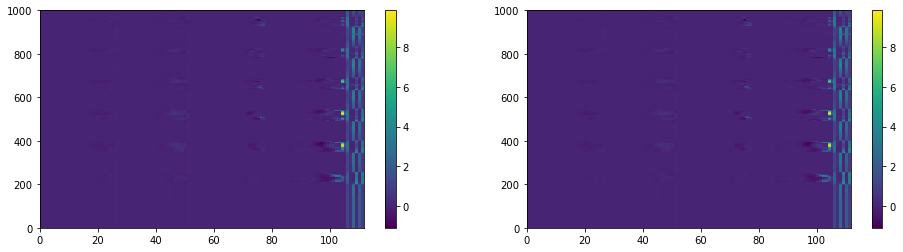

In [72]:
plt.figure(1,(16,4))
plt.subplot(1,2,1)
plt.pcolor(pred_keras[0:1000])
plt.colorbar()
plt.subplot(1,2,2)
plt.pcolor(pred_pytorch.detach().numpy()[0:1000])
plt.colorbar()

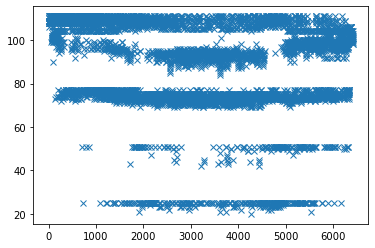

In [73]:
plt.plot(np.where(pred_keras-pred_pytorch.detach().numpy()>=1E-6)[1],'x')#np.max(pred_keras-pred_pytorch.detach().numpy()))

In [74]:
# save weights and biases 
to.save(ANN_4_torch,'real_geography/ANNs/ANN_4/ANN_4_CRM_lin.pt')

In [75]:
# save entire model 
to.jit.save(mod,'real_geography/ANNs/ANN_4/ANN_4_CRM_lin_jit.pt')